In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt 

# For legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Load the census block demographic data

In [2]:
census_blocks_demo = pd.read_csv('../data/census-blocks/census-blocks-demographics.csv')

In [4]:
census_blocks_demo.head()

,censusid,blockid,blockgroupname,total_population_edu,high_school_diploma,ged_credential,bachelors_degree,masters_degree,professional_degree,doctorate_degree,...,above_poverty_family_other_male_no_spouse_rate,above_poverty_family_other_female_no_spouse_rate,above_poverty_nonfamily_rate,above_poverty_nonfamily_male_rate,above_poverty_nonfamily_female_rate,total_population_assist,with_assistance,without_assistance,with_assistance_rate,without_assistance_rate
0,1500000US720019563001,720019563001,"Block Group 1, Census Tract 9563, Adjuntas Mun...",1163,302,21,228,0,17,0,...,0.000000,0.074875,0.128120,0.078203,0.049917,601,311,290,0.517471,0.482529
1,1500000US720019563002,720019563002,"Block Group 2, Census Tract 9563, Adjuntas Mun...",1582,367,27,343,32,0,0,...,0.021067,0.063202,0.066011,0.043539,0.022472,712,377,335,0.529494,0.470506
2,1500000US720019564001,720019564001,"Block Group 1, Census Tract 9564, Adjuntas Mun...",1167,281,20,145,14,0,0,...,0.000000,0.015267,0.085878,0.051527,0.034351,524,236,288,0.450382,0.549618
3,1500000US720019564002,720019564002,"Block Group 2, Census Tract 9564, Adjuntas Mun...",725,141,0,161,29,0,0,...,0.000000,0.000000,0.147139,0.043597,0.103542,367,199,168,0.542234,0.457766
4,1500000US720019565001,720019565001,"Block Group 1, Census Tract 9565, Adjuntas Mun...",1153,272,7,130,10,0,0,...,0.055785,0.074380,0.000000,0.000000,0.000000,484,275,209,0.568182,0.431818


In [6]:
census_blocks_demo.columns

Index(['censusid', 'blockid', 'blockgroupname', 'total_population_edu',
       'high_school_diploma', 'ged_credential', 'bachelors_degree',
       'masters_degree', 'professional_degree', 'doctorate_degree',
       'high_school_diploma_rate', 'ged_credential_rate',
       'bachelors_degree_rate', 'masters_degree_rate',
       'professional_degree_rate', 'doctorate_degree_rate',
       'total_population_employ', 'labor_force_total', 'civilian_labor_force',
       'employed_labor_force', 'unemployed_labor_force',
       'armed_forces_labor_force', 'not_labor_force_total', 'labor_force_rate',
       'civilian_labor_rate', 'employed_labor_rate', 'unemployed_labor_rate',
       'armed_forces_labor_rate', 'not_labor_force_rate',
       'total_population_income', 'income_less_10k', 'income_10k_15k',
       'income_15k_20k', 'income_20k_25k', 'income_25k_30k', 'income_30k_35k',
       'income_35k_40k', 'income_40k_45k', 'income_45k_50k', 'income_50k_60k',
       'income_60k_75k', 'income_75k_1

### Load the census block shapefiles for Puerto Rico
https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html

In [10]:
census_blocks_shp = gpd.read_file('../data/census-blocks/shapefiles/cb_2019_72_bg_500k.shp')

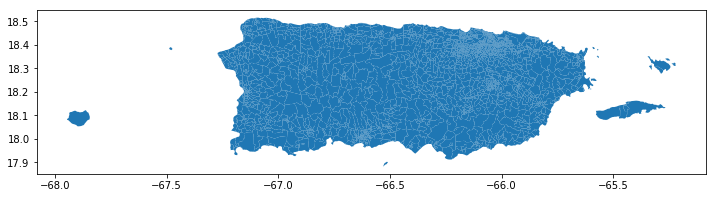

In [11]:
census_blocks_shp.plot(figsize=(12,12))

In [12]:
census_blocks_shp.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,72,081,958100,2,1500000US720819581002,720819581002,2,BG,945455,0,"POLYGON ((-66.889799 18.290016, -66.885969 18...."
1,72,097,080300,3,1500000US720970803003,720970803003,3,BG,85353,252718,"POLYGON ((-67.158957 18.2124494268293, -67.158..."
2,72,153,750400,2,1500000US721537504002,721537504002,2,BG,334281,0,"POLYGON ((-66.85737999999999 18.038261, -66.85..."
3,72,077,500200,4,1500000US720775002004,720775002004,4,BG,293804,0,"POLYGON ((-65.925048 18.228667, -65.92447 18.2..."
4,72,119,130200,2,1500000US721191302002,721191302002,2,BG,176202,0,"POLYGON ((-65.833009 18.38225, -65.832505 18.3..."


### Create the county outline for the map

In [14]:
# dissolve by the second column which is the county boundary, dissolve by first column is the state boundary
county_outline = census_blocks_shp.dissolve(by=census_blocks_shp.columns[1], aggfunc='first')

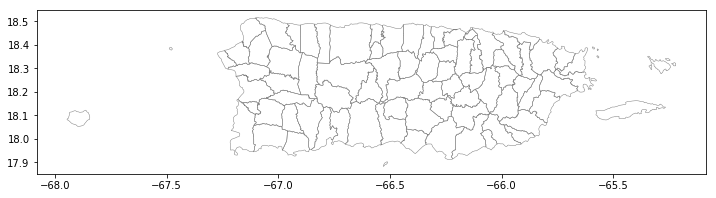

In [15]:
county_outline.plot(figsize=(12,12), facecolor='none', edgecolor='grey', linewidth=.5)

### Looks like there are 37 additional census blocks in the census_blocks_demographics. Need to investigate

In [23]:
df_all = census_blocks_demo.merge(census_blocks_shp.drop_duplicates(), left_on='censusid', right_on='AFFGEOID',                    how='left', indicator=True)
df_all['_merge'].value_counts()

both          2557
left_only       37
right_only       0
Name: _merge, dtype: int64

### Merge the demo and shapefile dataframes

In [25]:
# Merge the 2 dataframes by census_blocks_shp.AFFGEOID and census_blocks_demo.censusid
# Left join so that we only keep the blocks corresponding to the shapefile blocks
census_blocks_demo_map = census_blocks_shp.merge(
    census_blocks_demo.loc[:, ['censusid', 'below_poverty_rate', 'with_assistance_rate']], 
    how='left', left_on='AFFGEOID', right_on='censusid', validate='one_to_one')

In [26]:
census_blocks_demo_map.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,censusid,below_poverty_rate,with_assistance_rate
0,72,081,958100,2,1500000US720819581002,720819581002,2,BG,945455,0,"POLYGON ((-66.889799 18.290016, -66.885969 18....",1500000US720819581002,0.527687,0.452769
1,72,097,080300,3,1500000US720970803003,720970803003,3,BG,85353,252718,"POLYGON ((-67.158957 18.2124494268293, -67.158...",1500000US720970803003,0.295337,0.502591
2,72,153,750400,2,1500000US721537504002,721537504002,2,BG,334281,0,"POLYGON ((-66.85737999999999 18.038261, -66.85...",1500000US721537504002,0.687075,0.557823
3,72,077,500200,4,1500000US720775002004,720775002004,4,BG,293804,0,"POLYGON ((-65.925048 18.228667, -65.92447 18.2...",1500000US720775002004,0.662069,0.544828
4,72,119,130200,2,1500000US721191302002,721191302002,2,BG,176202,0,"POLYGON ((-65.833009 18.38225, -65.832505 18.3...",1500000US721191302002,0.440613,0.356322


### Visualize the below poverty rate

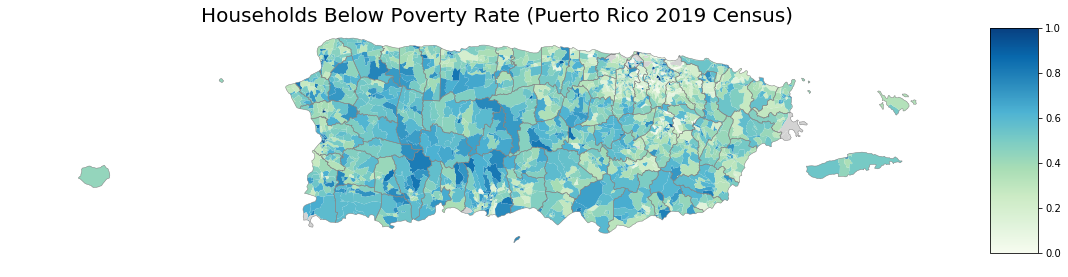

In [37]:
# https://geopandas.org/mapping.html

fig, ax = plt.subplots(figsize=(15, 10))

# Nice legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the demographic and superimpose the county outline
# Highlight the missing datapoints in grey
# color scheme: https://matplotlib.org/tutorials/colors/colormaps.html
census_blocks_demo_map.plot(column='below_poverty_rate', ax=ax, legend=True, cax=cax, cmap='GnBu', missing_kwds={'color': 'lightgrey'})
county_outline.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.5)

# title and layout
ax.set_title('Households Below Poverty Rate (Puerto Rico 2019 Census)', fontsize=20)
ax.axis('off')
plt.tight_layout()

### Visualize the public assistance rate

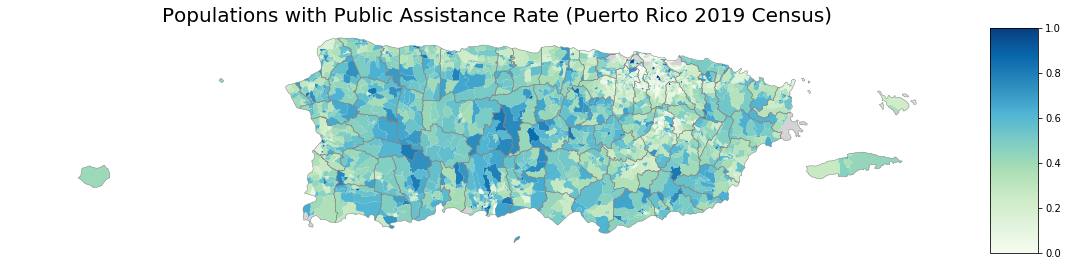

In [38]:
# https://geopandas.org/mapping.html

fig, ax = plt.subplots(figsize=(15, 10))

# Nice legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the demographic and superimpose the county outline
# Highlight the missing datapoints in grey
# color scheme: https://matplotlib.org/tutorials/colors/colormaps.html
census_blocks_demo_map.plot(column='with_assistance_rate', ax=ax, legend=True, cax=cax, cmap='GnBu', missing_kwds={'color': 'lightgrey'})
county_outline.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.5)

# title and layout
ax.set_title('Populations with Public Assistance Rate (Puerto Rico 2019 Census)', fontsize=20)
ax.axis('off')
plt.tight_layout()